In [30]:
#importing required modules
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Activation and Loss Function


In [31]:
#writing our activation function
def sigmoid(x):
  return 1/(1+torch.exp(-x))

#sigmoid deriv function to make cleaner code.
def sigmoid_deriv(x):
  return torch.exp(-x)/((1+torch.exp(-x))**2)


#writing our loss function
def loss(y_pred,y):
  return (y_pred-y)**4

#Backpropagation Function
###We recursievly find the gradient and return the 4 gradients we require.

In [32]:
#writing our back propogation function
def back_propagation(W1,W2,x1,x2,s1,s2,y,b1,b2,x0):

  #The below two tensors would help us calculate the local gradeint.
  #General notation da = dL/da where a is a paramter 
  z1 = torch.zeros(W1.size(1), W1.size(1))
  z2 = torch.zeros(W2.size(1),W2.size(1))

  for i in range(W1.size(1)):
    z1[i][i] = sigmoid_deriv(s1)[i][0]
  
  for i in range(W2.size(1)):
    z2[i][i] = sigmoid_deriv(s2)


  dx2 = 40*((x2-y)**3)
  ds2 = z2 @ dx2
  dw2 = x1 @ torch.transpose(ds2,0,1)
  db2 = ds2

  dx1 = W2 @ ds2
  ds1 = z1 @ dx1
  dw1 = x0 @ torch.transpose(ds1,0,1)
  db1 = ds1


  return dw2, db2, dw1, db1

#Generating concetric circular data which are not linearly seperable.

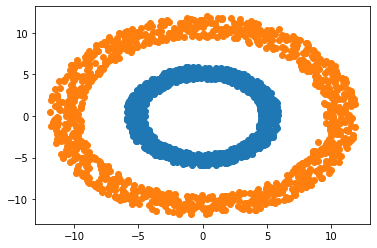

In [33]:

r = np.random.uniform([[4.5], [9.5]], [[6], [12]], size=(2, 1000))
angle = np.linspace(0, 2 * np.pi , 1000 )

X = [r[0] * np.cos(angle), r[1] * np.cos(angle)]
Y = [r[0] * np.sin(angle), r[1] * np.sin(angle)]

D1 = torch.empty(1000,2).fill_(1)
D2 = torch.empty(1000,2).fill_(1)

Xcopy = torch.transpose(torch.tensor(X),0,1)
Ycopy = torch.transpose(torch.tensor(Y),0,1)

D1[:,0] = Xcopy[:,0]
D1[:,1] = Ycopy[:,0]

D2[:,0] = Xcopy[:,1]
D2[:,1] = Ycopy[:,1]


plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])
plt.show()

#Combining them into a single set.
###We use sklearn to split our data into training and testing.

In [34]:
#Adding the extra dimension to data to take care of bias
X = torch.empty(2000,D1.size(1)).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2

#Creating the labels
Y = torch.empty(2000,1)
Y[::2,:2] = 1
Y[1::2,:2] = 0

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 123, test_size = 0.5, shuffle = True) 

#Our MLP_train function.
###This is the function which performs actual training.
Here we use the sigmoid function at two layers to get the output and we calculate gradient at each sample and take average of them and update our weights with it after every epoch unlike SGD which was done in problem 2.

In [35]:
def MLP_train(X,y,dim_hidden_layer,W1,W2,b1,b2,n_iters,learning_rate,loss3):
  for _ in range(n_iters):
    Dw1 = []
    Dw2 = []
    Db1 = []
    Db2 = []
    if(_ > 0 and _%50 == 0):
      print("The loss after {value1}th epoch is {value2}".format(value1 = _,value2 = loss1/1000))
      loss3.append(loss1/1000)
    loss1 = 0
    for idx, x_i in enumerate(X):
      #first we transpose our input matrix into a coloumn vector
      x0 = x_i.reshape(2,1)

      #Calculating the transpose of our weight matrix so we can apply forward pass
      W1copy = torch.transpose(W1,0,1)
      W2copy = torch.transpose(W2,0,1)

      #Forwards pass form input layer to hidden layer
      s1 = W1copy @ x0 + b1
      x1 = sigmoid(s1)

      #Forward pass from hidden layer to output layer
      s2 = W2copy @ x1 + b2
      x2 = sigmoid(s2)

      #Finding Gradients by applying backpropagation
      dw2,db2,dw1,db1 = back_propagation(W1,W2,x1,x2,s1,s2,y[idx],b1,b2,x0)
      Dw1.append(dw1)
      Dw2.append(dw2)
      Db1.append(db1)
      Db2.append(db2)

      #Calculating losses
      loss1 += loss(x2,y[idx]).item()

    W2 = W2 - learning_rate*(torch.mean(torch.stack(Dw2), dim=0))
    W1 = W1 - learning_rate*(torch.mean(torch.stack(Dw1), dim=0))
    b2 = b2 - learning_rate*(torch.mean(torch.stack(Db2), dim=0))
    b1 = b1 - learning_rate*(torch.mean(torch.stack(Db1), dim=0))

    
  return W1,W2,b1,b2,loss3


#Parameter Initializtion

In [36]:
dim_input_layer  = 2
dim_hidden_layer = 10
dim_output_layer = 1 
W1 = torch.rand(dim_input_layer,dim_hidden_layer)
W2 = torch.rand(dim_hidden_layer,dim_output_layer)
b1 = torch.zeros(dim_hidden_layer,1)
b2 = 0
n_iters = 1000
learning_rate = 0.1
loss3 = []

#Main call to our MLP_train function.

In [37]:
W1,W2,b1,b2,loss3= MLP_train(X_train,Y_train,dim_hidden_layer,W1,W2,b1,b2,n_iters,learning_rate,loss3)

The loss after 50th epoch is 0.06255580281093717
The loss after 100th epoch is 0.062001611340790984
The loss after 150th epoch is 0.061555426128208635
The loss after 200th epoch is 0.06102492755651474
The loss after 250th epoch is 0.060269949603825805
The loss after 300th epoch is 0.05909554020687938
The loss after 350th epoch is 0.05734791824966669
The loss after 400th epoch is 0.05498695141077042
The loss after 450th epoch is 0.05187851436063647
The loss after 500th epoch is 0.048099301636219026
The loss after 550th epoch is 0.043961536556482314
The loss after 600th epoch is 0.039625258659943936
The loss after 650th epoch is 0.035294041238725184
The loss after 700th epoch is 0.03116451131924987
The loss after 750th epoch is 0.027370037247426808
The loss after 800th epoch is 0.023993813788052647
The loss after 850th epoch is 0.02105958385579288
The loss after 900th epoch is 0.018546692639356478
The loss after 950th epoch is 0.016410332158906384


#Graph of Loss vs Number of Iterations


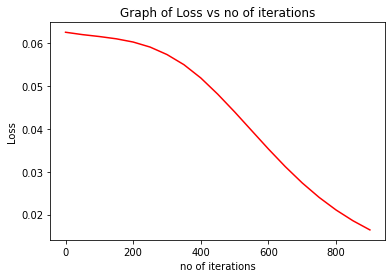

In [47]:
xgraph = np.arange(0,n_iters-50,50)
plt.plot(xgraph, loss3, '-r')
plt.xlabel('no of iterations')
plt.ylabel('Loss')
plt.title('Graph of Loss vs no of iterations')
plt.show()

#Printing our weights and Biases.

In [45]:
print("Weight matrix W1 = {value}".format(value = W1))
print("Bias matrix b1 = {value}".format(value = b1))
print("Weight matrix W2 = {value}".format(value = W1))
print("Bias b2 = {value}".format(value = b2))

Weight matrix W1 = tensor([[-0.2243,  0.4423, -0.0621,  0.6807,  0.2226,  0.2878,  0.4416,  0.3696,
          0.1842,  0.4241],
        [ 0.3656, -0.0785,  0.4849,  0.6644,  0.8981,  0.3470,  0.5622,  0.2753,
          0.5953, -0.1067]])
Bias matrix b1 = tensor([[ 1.5765],
        [-1.9212],
        [-2.4509],
        [-0.5823],
        [ 0.1835],
        [ 1.3463],
        [ 0.2761],
        [ 1.7031],
        [-0.0826],
        [ 1.1859]])
Weight matrix W2 = tensor([[-0.2243,  0.4423, -0.0621,  0.6807,  0.2226,  0.2878,  0.4416,  0.3696,
          0.1842,  0.4241],
        [ 0.3656, -0.0785,  0.4849,  0.6644,  0.8981,  0.3470,  0.5622,  0.2753,
          0.5953, -0.1067]])
Bias b2 = tensor([[-1.6917]])


#Function to check and print our accuracy.

In [46]:
def check_accuracy(W1,W2,b1,b2, X, y):
  correct = 0
  total = 0
  for idx, x_i in enumerate(X):
      x0 = x_i.reshape(2,1)

      W1copy = torch.transpose(W1,0,1)
      W2copy = torch.transpose(W2,0,1)

      s1 = W1copy @ x0 + b1
      x1 = sigmoid(s1)

      s2 = W2copy @ x1 + b2
      x2 = sigmoid(s2)

      y_pred = 0
      if(x2.item() > 0.5):
        y_pred = 1
      if(y_pred == y[idx]):
        correct += 1
      total += 1
  return correct/total
print("Accuracy = {value}".format(value=check_accuracy(W1,W2,b1,b2,X_test,Y_test)))

Accuracy = 1.0
